In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('C:\\Users\\mubah\\Desktop\\Thesis\\windows10_dataset.csv')
print(df.shape)
df.head()

(35975, 127)


,ts,Processor_DPC_Rate,Processor_pct_ Idle_Time,Processor_pct_ C3_Time,Processor_pct_ Interrupt_Time,Processor_pct_ C2_Time,Processor_pct_ User_Time,Processor_pct_ C1_Time,Processor_pct_ Processor_Time,Processor_C1_ransitions_sec,...,LogicalDisk(_Total) Avg Disk Write Queue Length,LogicalDisk(_Total) Avg Disk Queue Length,LogicalDisk(_Total) pct_ Disk Read Time,LogicalDisk(_Total) Disk Write Bytes sec,LogicalDisk(_Total) Disk Transfers sec,LogicalDisk(_Total) Avg Disk Bytes Transfer,LogicalDisk(_Total) pct_ Disk Write Time,LogicalDisk(_Total) Avg Disk sec Transfer,label,type
0,1554206309,4,29.90817156,0,0.078240397,0,61.02750947,29.90817156,66.2001486,480.0949912,...,0.134876119,0.163098103,2.822198461,1924988.236,402.5827836,9100.481592,13.48761188,0.000405118,0,normal
1,1554206319,9,31.75168186,0,0.312520973,0,59.14459419,31.75168186,66.24773489,427.0412837,...,0.157564294,0.189279353,3.17150584,1497232.743,355.1343322,11153.55449,15.75642941,0.000532995,0,normal
2,1554206329,5,29.49516707,0,1.16822183,0,46.02794011,29.49516707,66.90038148,1159.426821,...,0.401773775,0.782471877,38.06981014,1854228.536,760.4317685,26994.26595,40.17737752,0.001028323,0,normal
3,1554206339,12,18.22437505,0,1.097191902,0,47.80621859,18.22437505,79.54520811,736.622011,...,0.259062331,0.768934004,50.98716725,15912390.29,699.4999538,53141.6638,25.90623311,0.001099429,0,normal
4,1554206349,12,14.86118688,0,1.562431019,0,41.8731513,14.86118688,82.73513724,896.1085985,...,0.103836186,1.081729712,97.7893526,23609299.7,1184.550425,40988.68444,10.38361856,0.000912738,0,normal


In [15]:
df.drop(['type','ts'], inplace = True, axis = 1)

In [16]:
# 'Memory Pool Paged Resident Bytes', 'Memory System Driver Total Bytes', 'Memory Standby Cache Core Bytes', 'Memory Long-Term Average Standby Cache Lifetime (s)', 'Memory Pool Nonpaged Bytes', 'Memory Pool Paged Bytes', 

In [17]:
df.columns.values.tolist()


['Processor_DPC_Rate',
 'Processor_pct_ Idle_Time',
 'Processor_pct_ C3_Time',
 'Processor_pct_ Interrupt_Time',
 'Processor_pct_ C2_Time',
 'Processor_pct_ User_Time',
 'Processor_pct_ C1_Time',
 'Processor_pct_ Processor_Time',
 'Processor_C1_ransitions_sec',
 'Processor_pct_ DPC_Time',
 'Processor_C2_ransitions_sec',
 'Processor_pct_ Privileged_Time',
 'Processor_C3_ransitions_sec',
 'Processor_DPCs_Queued_sec',
 'Processor_Interrupts_sec',
 'Process_Pool_Paged Bytes',
 'Process_IO Read_Operations_sec',
 'Process_Working_Set_ Private',
 'Process_Working_Set_Peak',
 'Process_IO_Write Operations_sec',
 'Process_Page_File Bytes',
 'Process_pct_ User_Time',
 'Process_Virtual_Bytes Peak',
 'Process_Page_File Bytes Peak',
 'Process_IO_Other_Bytes_sec',
 'Process_Private_Bytes',
 'Process_IO_Write_Bytes_sec',
 'Process_Elapsed_Time',
 'Process_Virtual_Bytes',
 'Process_pct_ Processor_Time',
 'Process_Creating Process ID',
 'Process_Pool Nonpaged Bytes',
 'Process_Working Set',
 'Process_Pa

In [18]:
df = df.astype(str)

In [19]:
df = df[~df.applymap(lambda x: x.strip()).eq('').any(axis=1)]

In [20]:
# df = df[~df[['Process_IO Read_Operations_sec']].str.strip().eq('')]

In [21]:
print(df['Process_IO Read_Operations_sec'].str.strip().eq('').value_counts())

False    35214
Name: Process_IO Read_Operations_sec, dtype: int64


In [22]:
# columns_with_spaces = df.columns[df.apply(lambda x: x.str.isspace().any())]
# print(columns_with_spaces)

In [23]:
# columns_with_spaces = windows.columns[windows.apply(lambda x: x.str.isspace().any())]
# print(columns_with_spaces)

<AxesSubplot:>

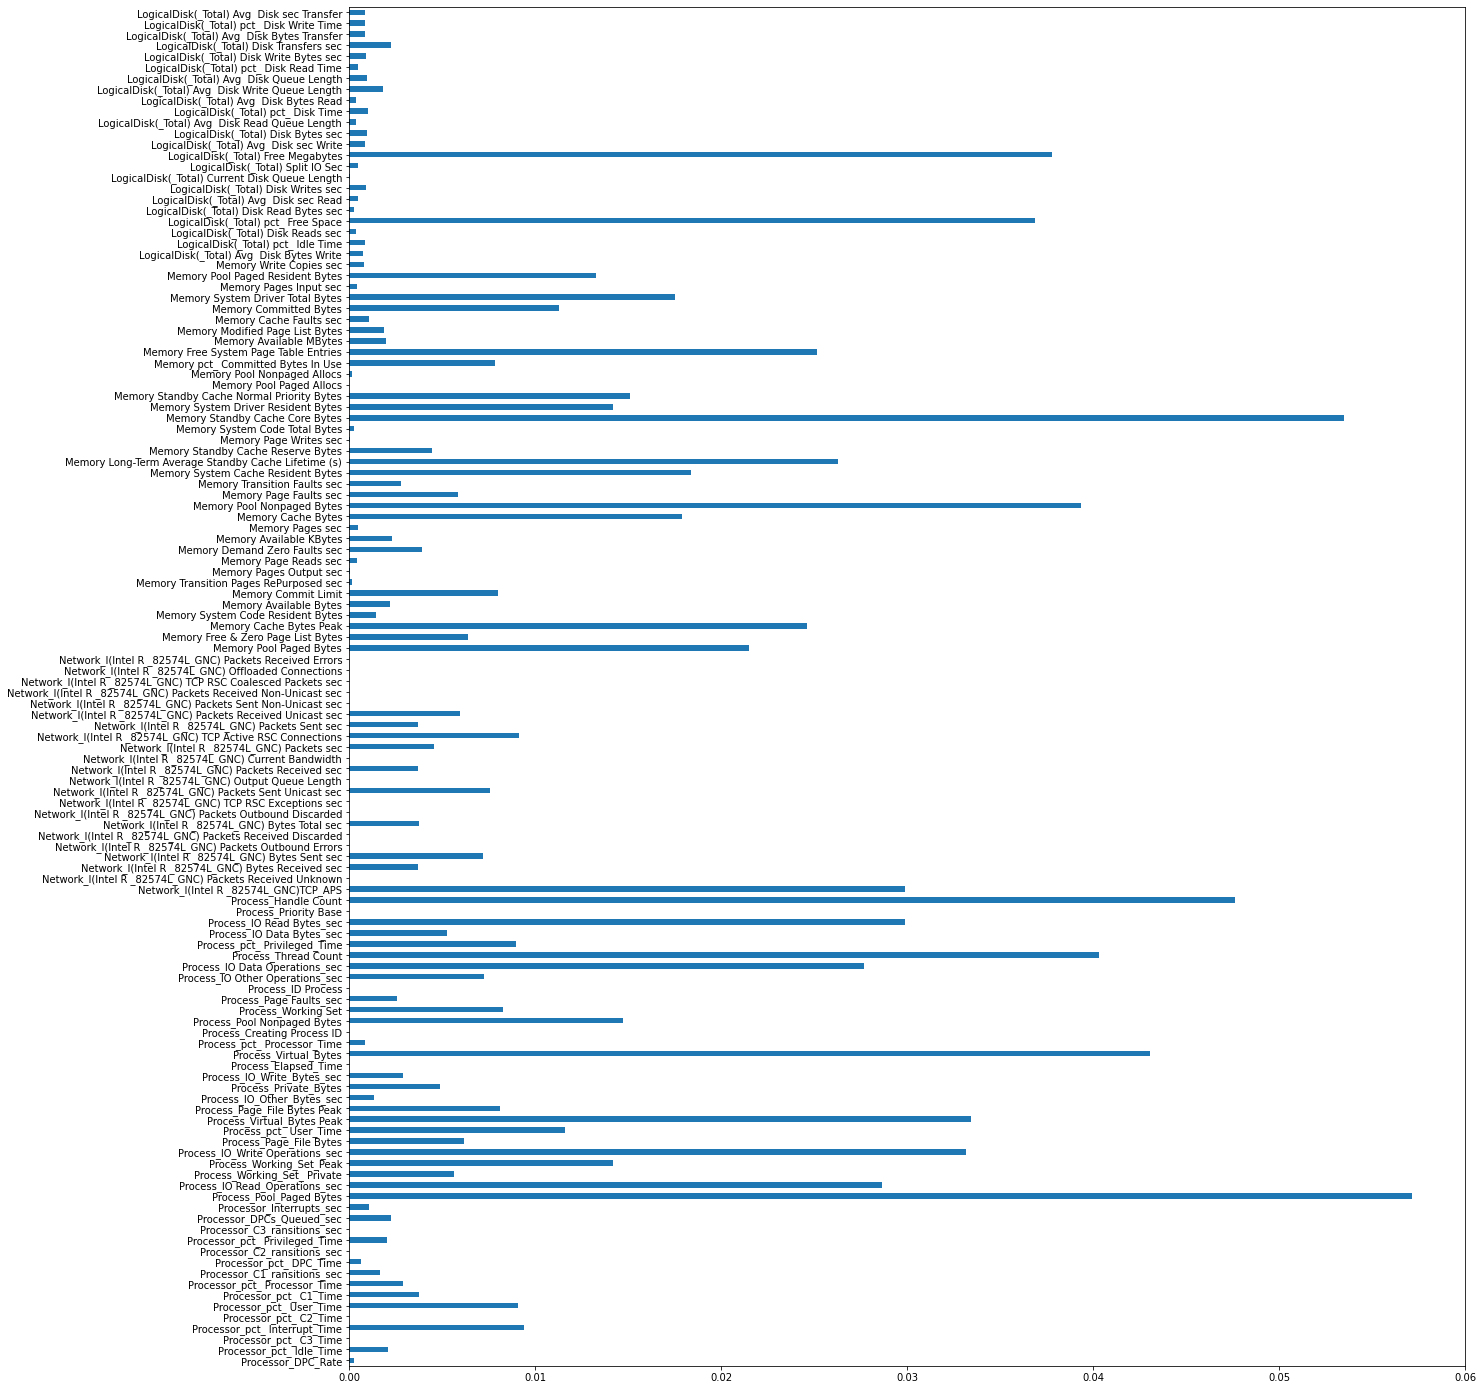

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier



X = df.drop('label', axis=1)
y = df['label']

model = RandomForestClassifier()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns)
   # .nlargest(4)
   .plot(kind='barh',figsize = (20, 25) ))

**Feature importance based on random forest**

In [25]:
df = df.loc[:, ['LogicalDisk(_Total) Free Megabytes' , 'LogicalDisk(_Total) pct_ Free Space' , 'Memory Pool Paged Resident Bytes', 'Memory System Driver Total Bytes' ,'Memory Committed Bytes' , 'Memory Free System Page Table Entries', 'Memory Standby Cache Core Bytes','Memory System Driver Resident Bytes','Memory Standby Cache Normal Priority Bytes', 'Memory Long-Term Average Standby Cache Lifetime (s)', 'Memory Free System Page Table Entries','Memory System Cache Resident Bytes' , 'Memory Pool Nonpaged Bytes', 'Memory Cache Bytes', 'Memory Pool Paged Bytes','Memory Cache Bytes Peak', 'Network_I(Intel R _82574L_GNC) Bytes Sent sec' ,'Network_I(Intel R _82574L_GNC)TCP_APS','Process_IO Read Bytes_sec','Process_Handle Count','Process_IO Data Operations_sec','Process_Thread Count','Process_Pool Nonpaged Bytes','Process_Working Set','Process_Virtual_Bytes','Process_pct_ User_Time','Process_Virtual_Bytes Peak','Process_Working_Set_Peak','Process_IO_Write Operations_sec' ,'Process_Pool_Paged Bytes','Process_IO Read_Operations_sec', 'label' ]]



In [26]:
df = df.astype(float)

<AxesSubplot:>

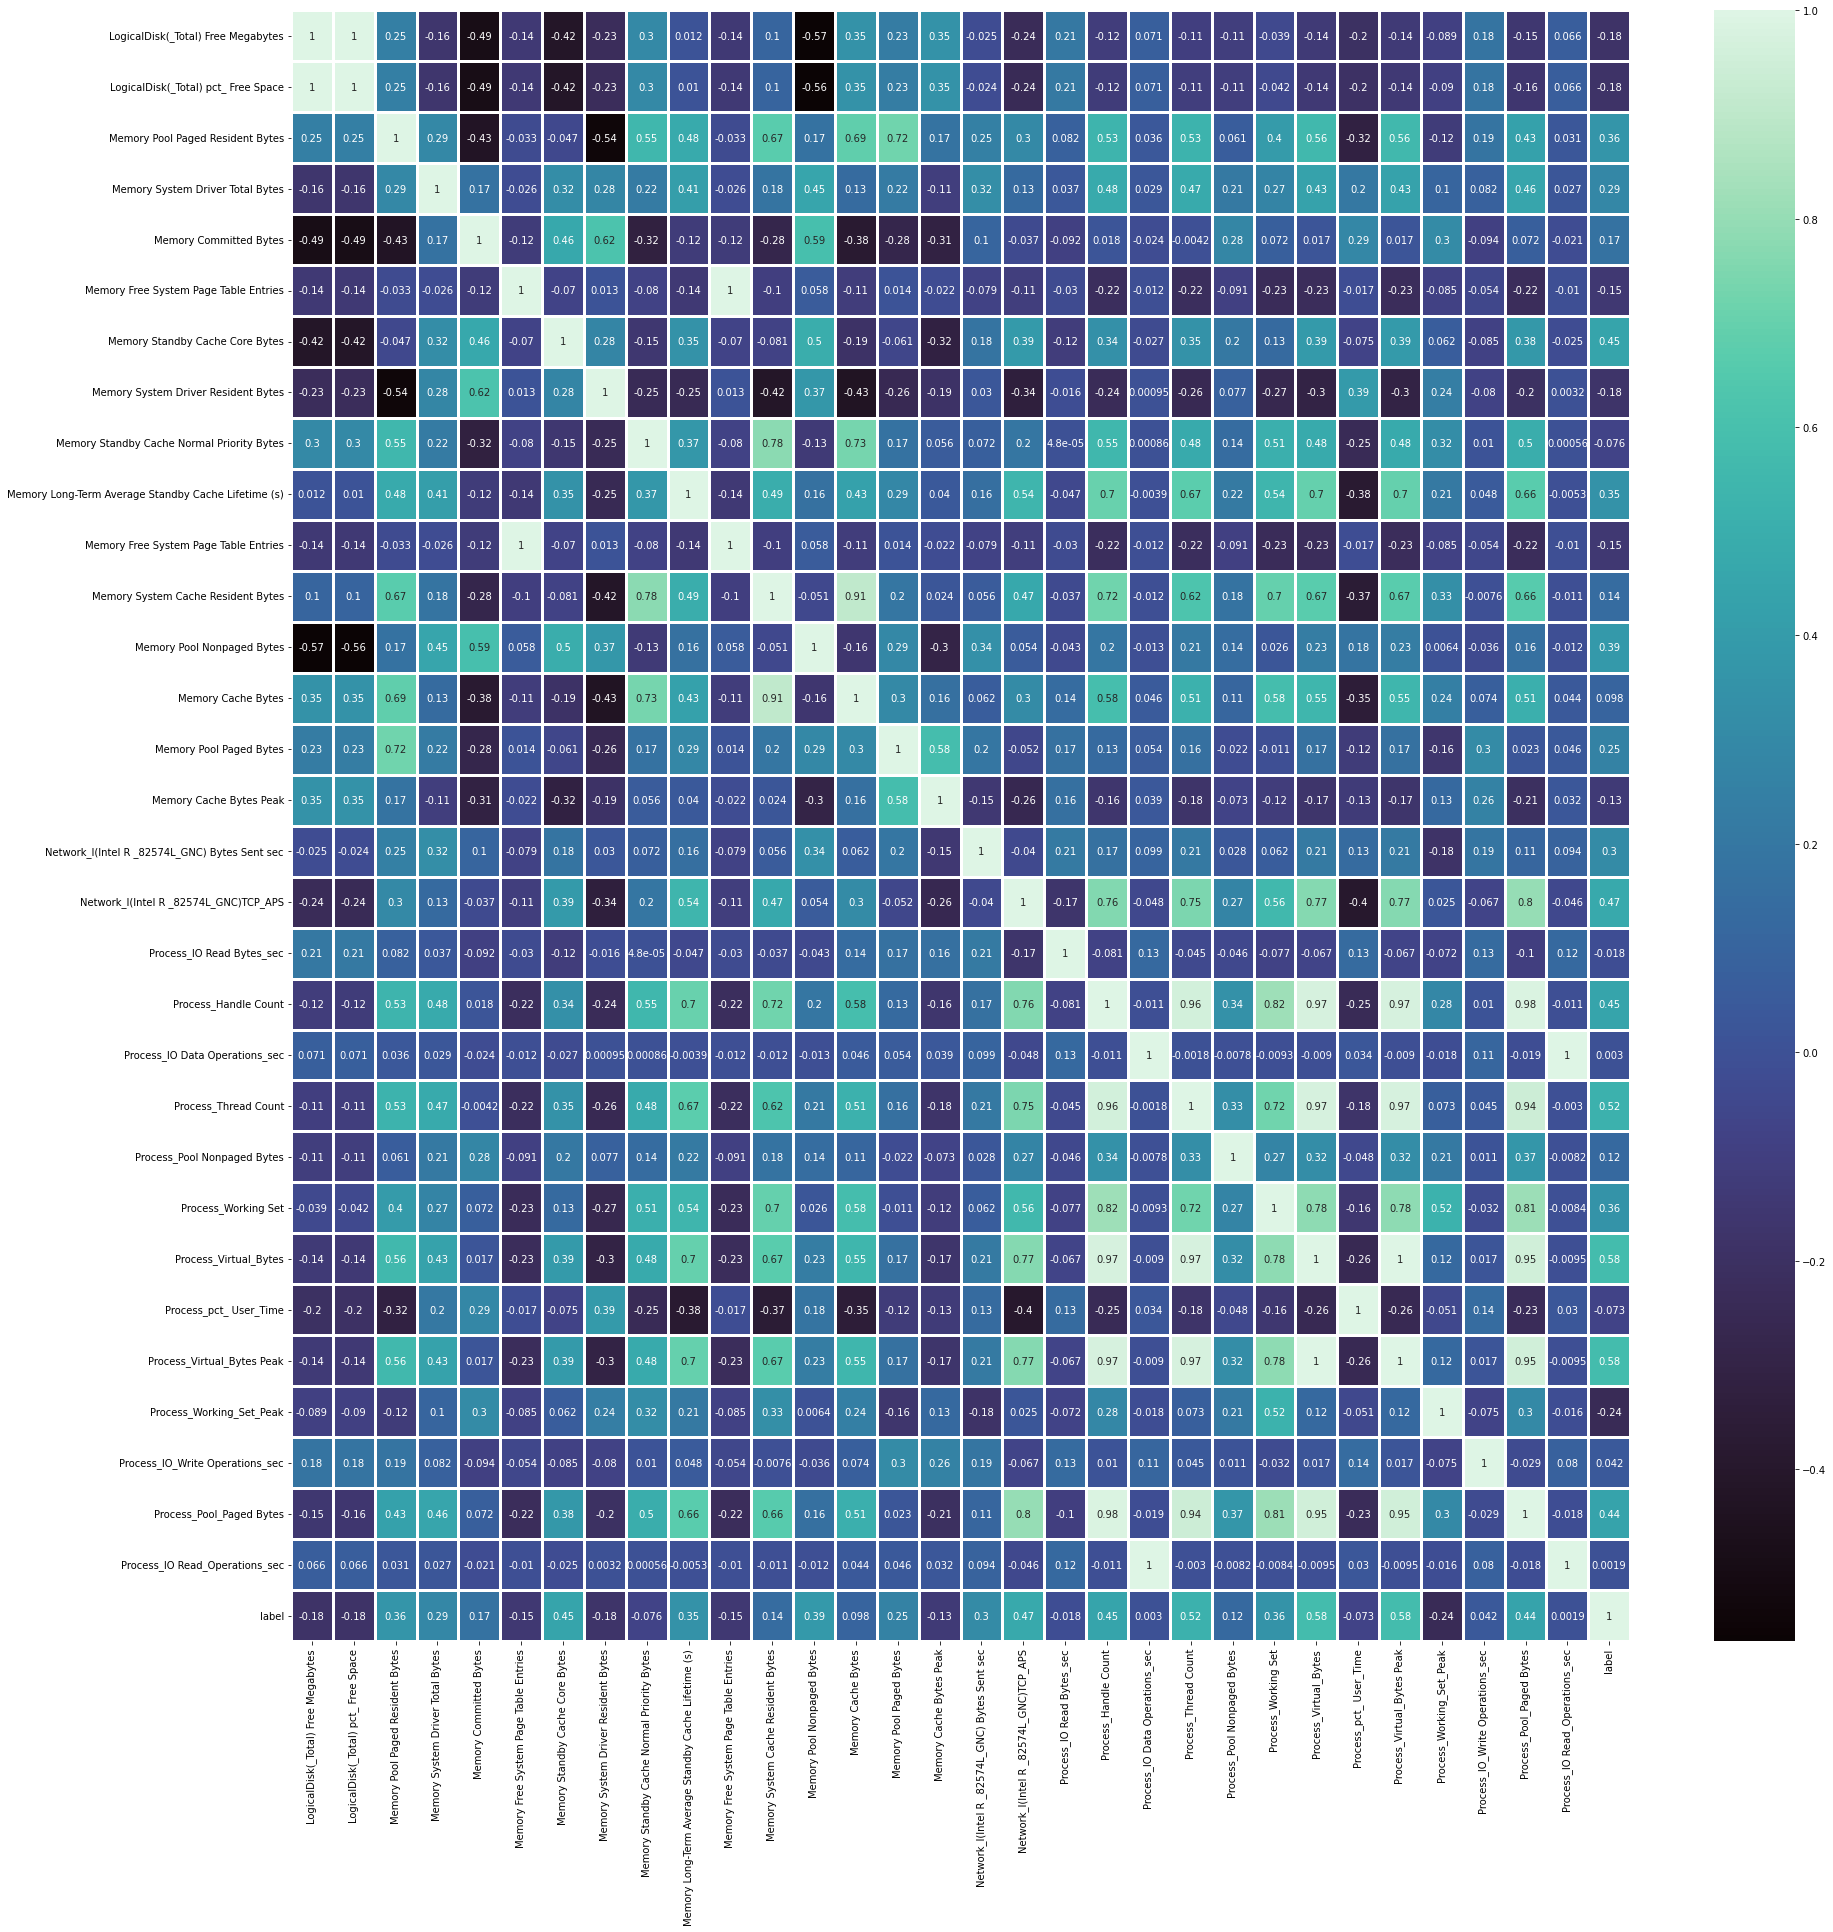

In [27]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, linewidth = 3, cmap='mako')

In [28]:
df.drop('Memory Free System Page Table Entries', inplace = True, axis = 1)

In [29]:
# df = df.loc[:, ['Memory Pool Paged Resident Bytes','Memory System Driver Total Bytes', 'Memory Standby Cache Core Bytes', 'Memory Long-Term Average Standby Cache Lifetime (s)','Memory Pool Nonpaged Bytes','Memory Pool Paged Bytes','Network_I(Intel R _82574L_GNC) Bytes Sent sec' ,'Network_I(Intel R _82574L_GNC)TCP_APS', 'Process_Handle Count','Process_Thread Count','Process_Working Set','Process_Virtual_Bytes','Process_Virtual_Bytes Peak','Process_Working_Set_Peak', 'Process_Pool_Paged Bytes', 'label']] 
# #---corelation heatmap---- 
# import seaborn as sns
# plt.figure(figsize=(20, 15)) 
# sns.heatmap(df.corr(), annot=True, linewidth = 3, cmap='mako')

col:  LogicalDisk(_Total) Free Megabytes


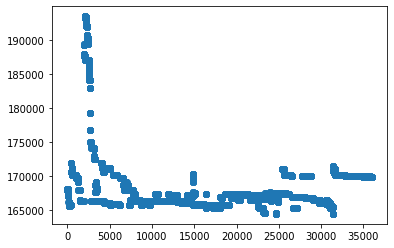

col:  LogicalDisk(_Total) pct_ Free Space


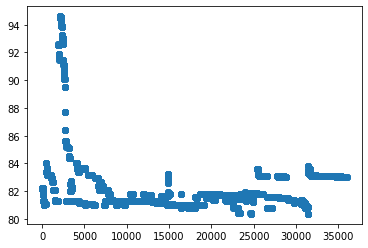

col:  Memory Pool Paged Resident Bytes


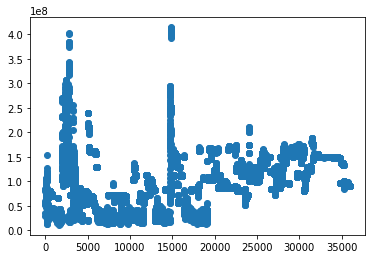

col:  Memory System Driver Total Bytes


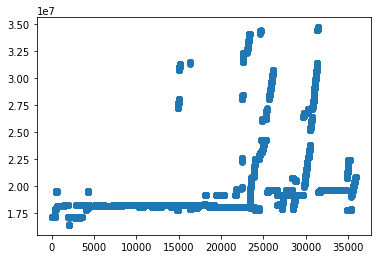

col:  Memory Committed Bytes


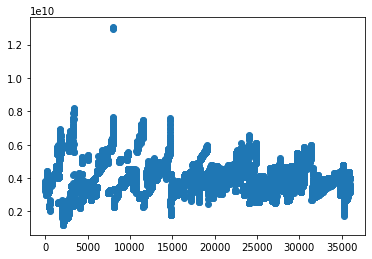

col:  Memory Standby Cache Core Bytes


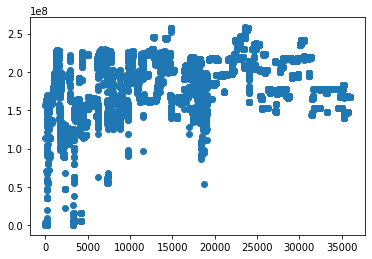

col:  Memory System Driver Resident Bytes


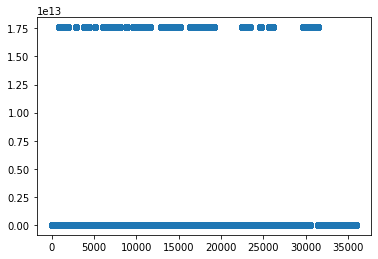

col:  Memory Standby Cache Normal Priority Bytes


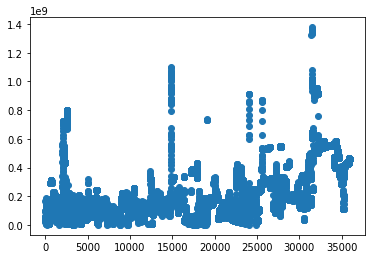

col:  Memory Long-Term Average Standby Cache Lifetime (s)


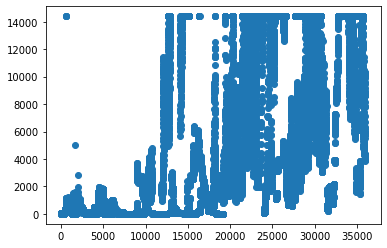

col:  Memory System Cache Resident Bytes


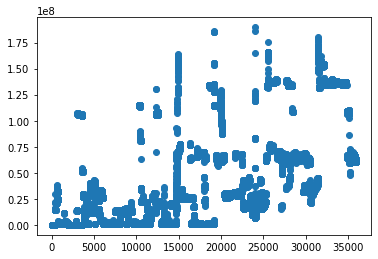

col:  Memory Pool Nonpaged Bytes


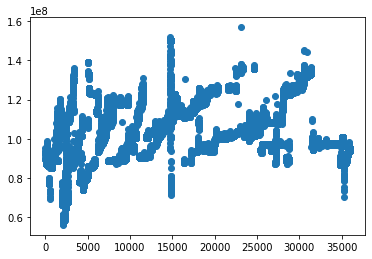

col:  Memory Cache Bytes


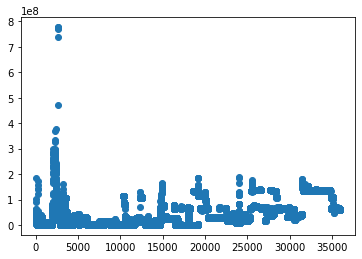

col:  Memory Pool Paged Bytes


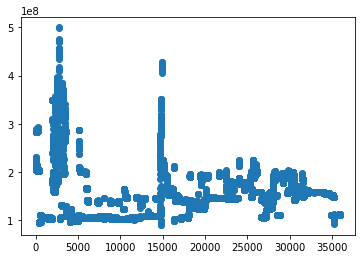

col:  Memory Cache Bytes Peak


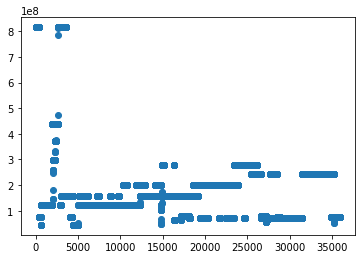

col:  Network_I(Intel R _82574L_GNC) Bytes Sent sec


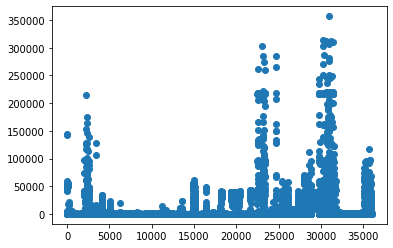

col:  Network_I(Intel R _82574L_GNC)TCP_APS


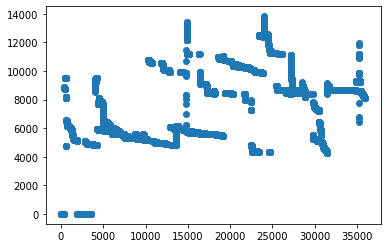

col:  Process_IO Read Bytes_sec


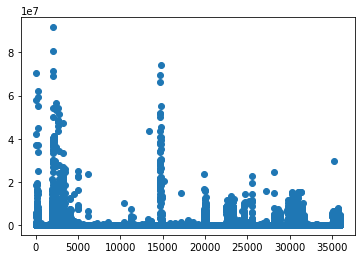

col:  Process_Handle Count


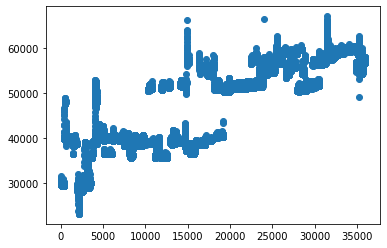

col:  Process_IO Data Operations_sec


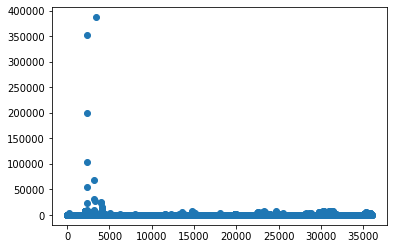

col:  Process_Thread Count


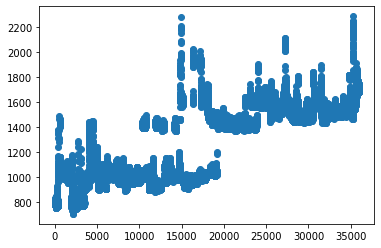

col:  Process_Pool Nonpaged Bytes


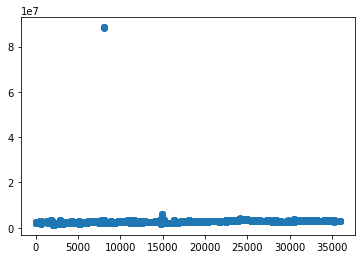

col:  Process_Working Set


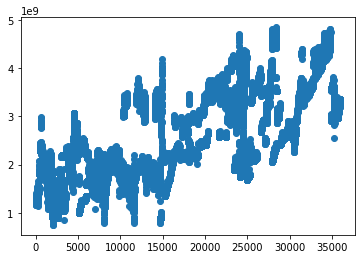

col:  Process_Virtual_Bytes


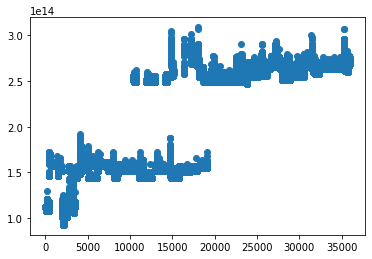

col:  Process_pct_ User_Time


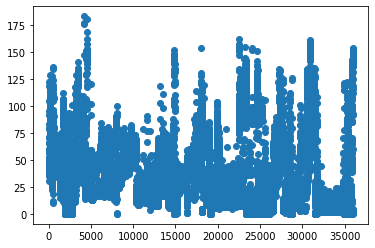

col:  Process_Virtual_Bytes Peak


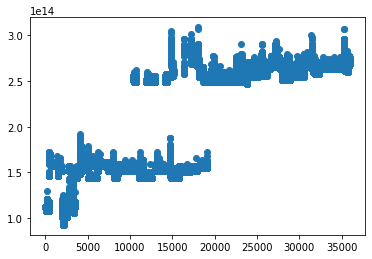

col:  Process_Working_Set_Peak


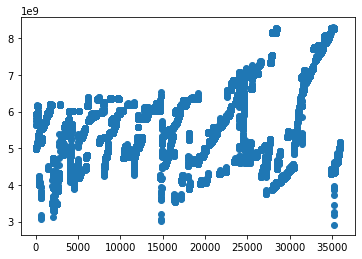

col:  Process_IO_Write Operations_sec


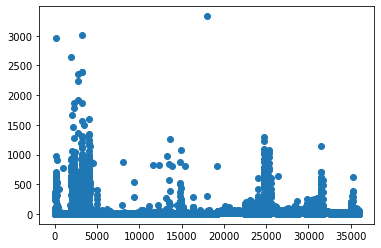

col:  Process_Pool_Paged Bytes


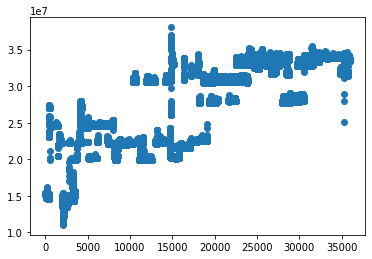

col:  Process_IO Read_Operations_sec


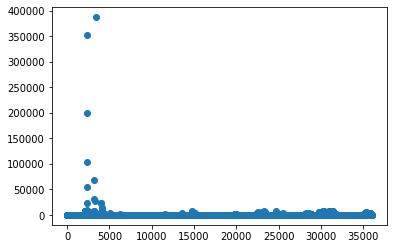

col:  label


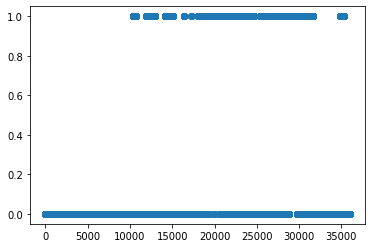

In [30]:
import matplotlib.pyplot as plt
columns = df.columns
for col in columns:
    print("col: ", col)
    plt.scatter(df.index, df[col])
    plt.show()

In [31]:
df.drop(['Memory System Driver Total Bytes',
'Memory System Driver Resident Bytes',
'Memory System Cache Resident Bytes',
'Memory Pool Nonpaged Bytes',
'Memory Pool Paged Bytes',
'Memory Cache Bytes Peak',
'Network_I(Intel R _82574L_GNC)TCP_APS',
'Process_Handle Count',
'Process_Thread Count',
'Process_Working Set',
'Process_Virtual_Bytes',
'Process_Virtual_Bytes Peak',
'Process_Working_Set_Peak',
'Process_Pool_Paged Bytes'], inplace = True, axis = 1)

col:  LogicalDisk(_Total) Free Megabytes


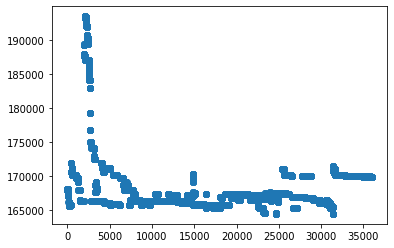

col:  LogicalDisk(_Total) pct_ Free Space


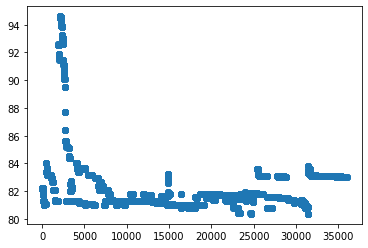

col:  Memory Pool Paged Resident Bytes


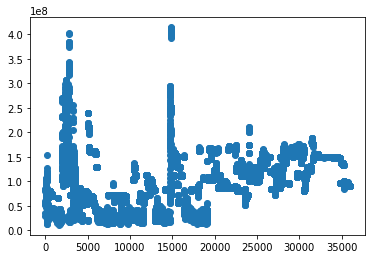

col:  Memory Committed Bytes


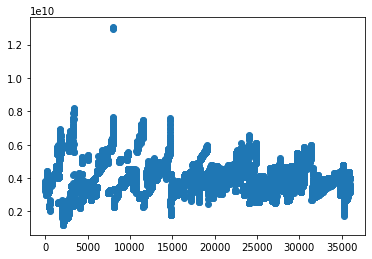

col:  Memory Standby Cache Core Bytes


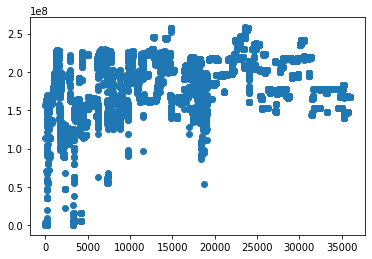

col:  Memory Standby Cache Normal Priority Bytes


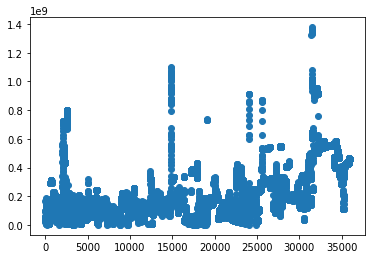

col:  Memory Long-Term Average Standby Cache Lifetime (s)


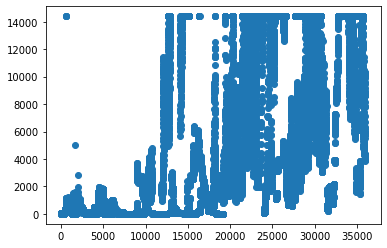

col:  Memory Cache Bytes


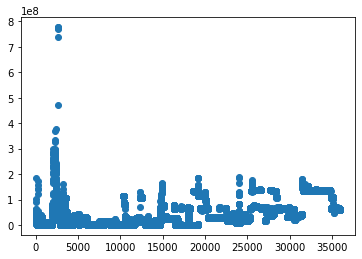

col:  Network_I(Intel R _82574L_GNC) Bytes Sent sec


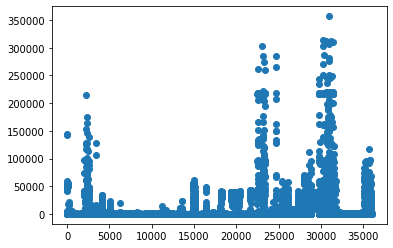

col:  Process_IO Read Bytes_sec


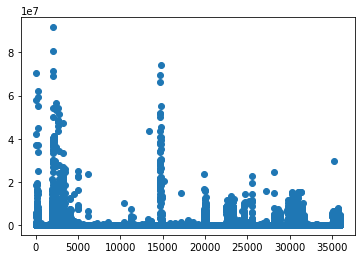

col:  Process_IO Data Operations_sec


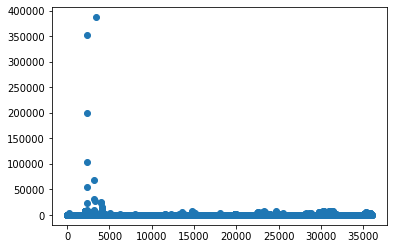

col:  Process_Pool Nonpaged Bytes


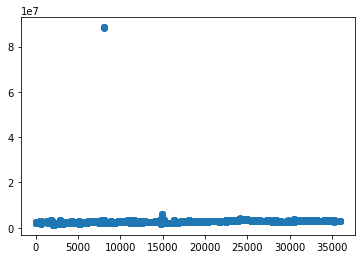

col:  Process_pct_ User_Time


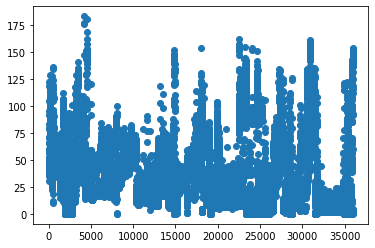

col:  Process_IO_Write Operations_sec


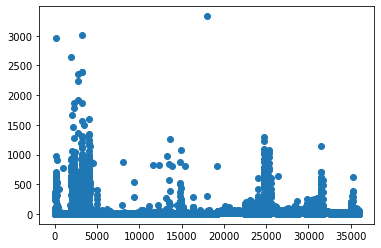

col:  Process_IO Read_Operations_sec


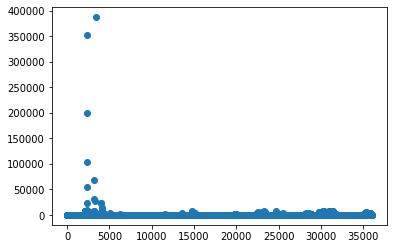

col:  label


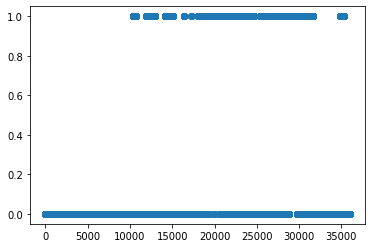

In [32]:
import matplotlib.pyplot as plt
columns = df.columns
for col in columns:
    print("col: ", col)
    plt.scatter(df.index, df[col])
    plt.show()

In [33]:
df.head()

,LogicalDisk(_Total) Free Megabytes,LogicalDisk(_Total) pct_ Free Space,Memory Pool Paged Resident Bytes,Memory Committed Bytes,Memory Standby Cache Core Bytes,Memory Standby Cache Normal Priority Bytes,Memory Long-Term Average Standby Cache Lifetime (s),Memory Cache Bytes,Network_I(Intel R _82574L_GNC) Bytes Sent sec,Process_IO Read Bytes_sec,Process_IO Data Operations_sec,Process_Pool Nonpaged Bytes,Process_pct_ User_Time,Process_IO_Write Operations_sec,Process_IO Read_Operations_sec,label
0,167984.0,82.156219,83619840.0,3.460387e+09,157052928.0,95240192.0,48.0,18944000.0,221.720966,8.755815e+04,293.825345,2447032.0,122.055019,282.909543,10.915802,0.0
1,167984.0,82.156219,83984384.0,3.459990e+09,157036544.0,94769152.0,48.0,16445440.0,210.620362,7.339650e+04,239.723175,2451920.0,118.289188,230.722305,9.000870,0.0
2,167984.0,82.156219,79081472.0,3.522941e+09,113893376.0,23834624.0,46.0,14024704.0,209.808634,3.775767e+06,694.779399,2408264.0,92.055880,373.889746,320.889654,0.0
3,167984.0,82.156219,52133888.0,3.688444e+09,2453504.0,63152128.0,29.0,5312512.0,262.663637,4.887542e+06,677.628039,2318640.0,95.612437,296.474808,381.153231,0.0
4,167984.0,82.156219,29245440.0,3.688333e+09,2338816.0,52461568.0,31.0,2392064.0,210.484576,4.646488e+06,753.786644,2248992.0,83.590059,306.531906,447.254738,0.0


In [34]:
#Mention column name along with range
temp = df[(df['LogicalDisk(_Total) Free Megabytes'] >= 165000) & (df['LogicalDisk(_Total) Free Megabytes']<= 175000)] 
#Mention Column name along with column index
df['LogicalDisk(_Total) Free Megabytes'] = temp.iloc[:,0]

#Mention column name along with range
temp = df[(df['LogicalDisk(_Total) pct_ Free Space'] >= 80) & (df['LogicalDisk(_Total) pct_ Free Space']<= 84)] 
#Mention Column name along with column index
df['LogicalDisk(_Total) pct_ Free Space'] = temp.iloc[:,1]

#Mention column name along with range
temp = df[(df['Memory Pool Paged Resident Bytes'] >= .75*10**8) & (df['Memory Pool Paged Resident Bytes']<= 2*10**8)] 
#Mention Column name along with column index
df['Memory Pool Paged Resident Bytes'] = temp.iloc[:,2]

#Mention column name along with range
temp = df[(df['Memory Committed Bytes'] >= 0.2*10**10) & (df['Memory Committed Bytes']<= 0.6*10**10)] 
#Mention Column name along with column index
df['Memory Committed Bytes'] = temp.iloc[:,3]


#Mention column name along with range
temp = df[(df['Memory Standby Cache Core Bytes'] >= 1*10**8) & (df['Memory Standby Cache Core Bytes']<= 2.25*10**8)] 
#Mention Column name along with column index
df['Memory Standby Cache Core Bytes'] = temp.iloc[:,4]


#Mention column name along with range
temp = df[(df['Memory Standby Cache Normal Priority Bytes'] >= 0) & (df['Memory Standby Cache Normal Priority Bytes']<= 0.5*10**9)] 
#Mention Column name along with column index
df['Memory Standby Cache Normal Priority Bytes'] = temp.iloc[:,5]


df['Memory Long-Term Average Standby Cache Lifetime (s)'] = df['Memory Long-Term Average Standby Cache Lifetime (s)']

#Mention column name along with range
temp = df[(df['Memory Cache Bytes'] >= 0) & (df['Memory Cache Bytes']<= 2*10**8)] 
#Mention Column name along with column index
df['Memory Cache Bytes'] = temp.iloc[:,7]

#Mention column name along with range
temp = df[(df['Network_I(Intel R _82574L_GNC) Bytes Sent sec'] >= 0) & (df['Network_I(Intel R _82574L_GNC) Bytes Sent sec']<= 100000)] 
#Mention Column name along with column index
df['Network_I(Intel R _82574L_GNC) Bytes Sent sec'] = temp.iloc[:,8]


#Mention column name along with range
temp = df[(df['Process_IO Read Bytes_sec'] >= 0) & (df['Process_IO Read Bytes_sec']<= 2*10**7)] 
#Mention Column name along with column index
df['Process_IO Read Bytes_sec'] = temp.iloc[:,9]

#Mention column name along with range
temp = df[(df['Process_IO Data Operations_sec'] >= 0) & (df['Process_IO Data Operations_sec']<= 10000)] 
#Mention Column name along with column index
df['Process_IO Data Operations_sec'] = temp.iloc[:,10]


#Mention column name along with range
temp = df[(df['Process_Pool Nonpaged Bytes'] >= 0) & (df['Process_Pool Nonpaged Bytes']<= 4*10**6)] 
#Mention Column name along with column index
df['Process_Pool Nonpaged Bytes'] = temp.iloc[:,11]


#Mention column name along with range
temp = df[(df['Process_pct_ User_Time'] >= 0) & (df['Process_pct_ User_Time']<= 100)] 
#Mention Column name along with column index
df['Process_pct_ User_Time'] = temp.iloc[:,12]


#Mention column name along with range
temp = df[(df['Process_IO_Write Operations_sec'] >= 0) & (df['Process_IO_Write Operations_sec']<= 500)] 
#Mention Column name along with column index
df['Process_IO_Write Operations_sec'] = temp.iloc[:,13]


#Mention column name along with range
temp = df[(df['Process_IO Read_Operations_sec'] >= 0) & (df['Process_IO Read_Operations_sec']<= 8000)] 
#Mention Column name along with column index
df['Process_IO Read_Operations_sec'] = temp.iloc[:,14]

col:  LogicalDisk(_Total) Free Megabytes


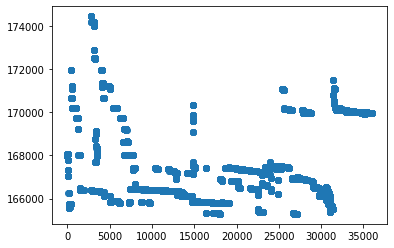

col:  LogicalDisk(_Total) pct_ Free Space


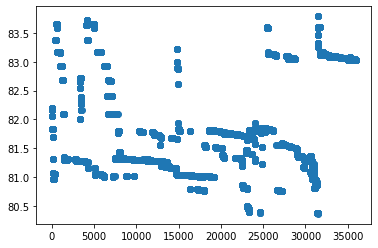

col:  Memory Pool Paged Resident Bytes


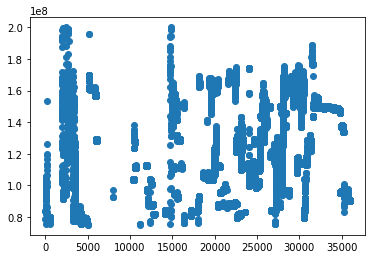

col:  Memory Committed Bytes


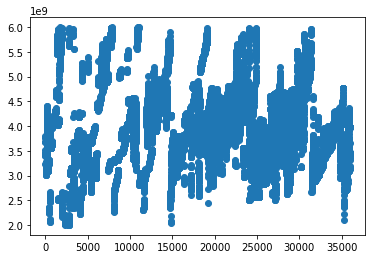

col:  Memory Standby Cache Core Bytes


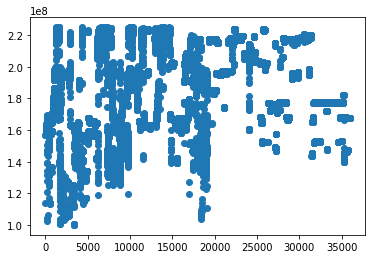

col:  Memory Standby Cache Normal Priority Bytes


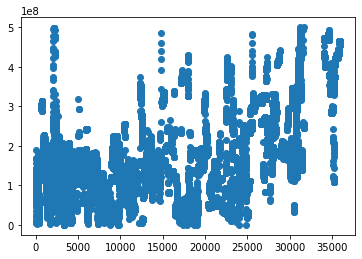

col:  Memory Long-Term Average Standby Cache Lifetime (s)


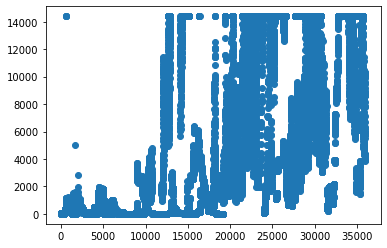

col:  Memory Cache Bytes


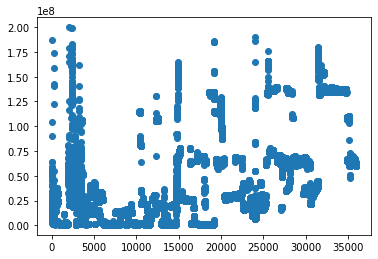

col:  Network_I(Intel R _82574L_GNC) Bytes Sent sec


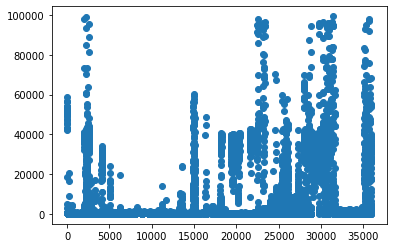

col:  Process_IO Read Bytes_sec


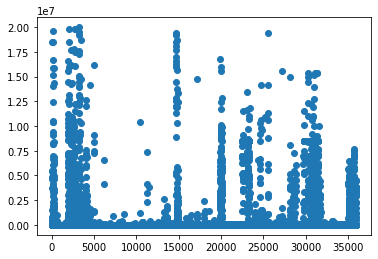

col:  Process_IO Data Operations_sec


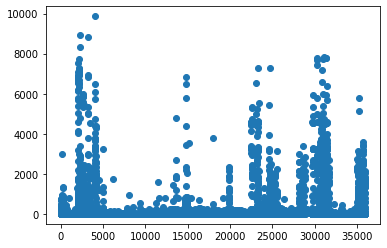

col:  Process_Pool Nonpaged Bytes


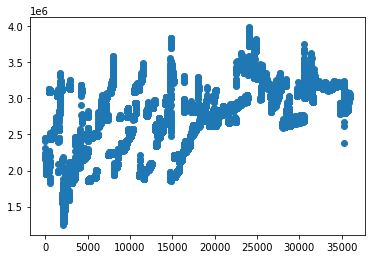

col:  Process_pct_ User_Time


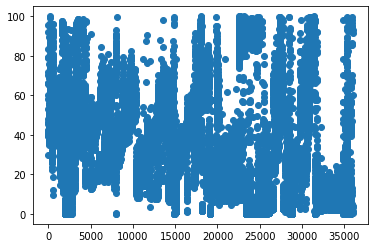

col:  Process_IO_Write Operations_sec


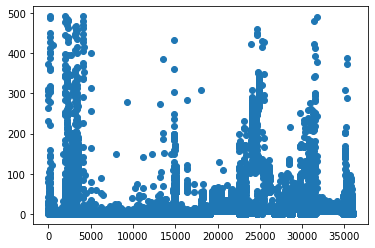

col:  Process_IO Read_Operations_sec


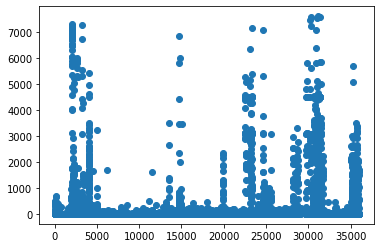

col:  label


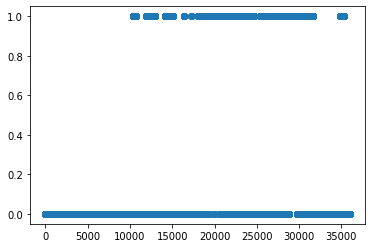

In [35]:
import matplotlib.pyplot as plt
columns = df.columns
for col in columns:
    print("col: ", col)
    plt.scatter(df.index, df[col])
    plt.show()

In [36]:
df.isnull().sum().sum()

25933

In [37]:
df.dropna(inplace = True)

In [38]:
df.isnull().sum().sum()

0

<AxesSubplot:>

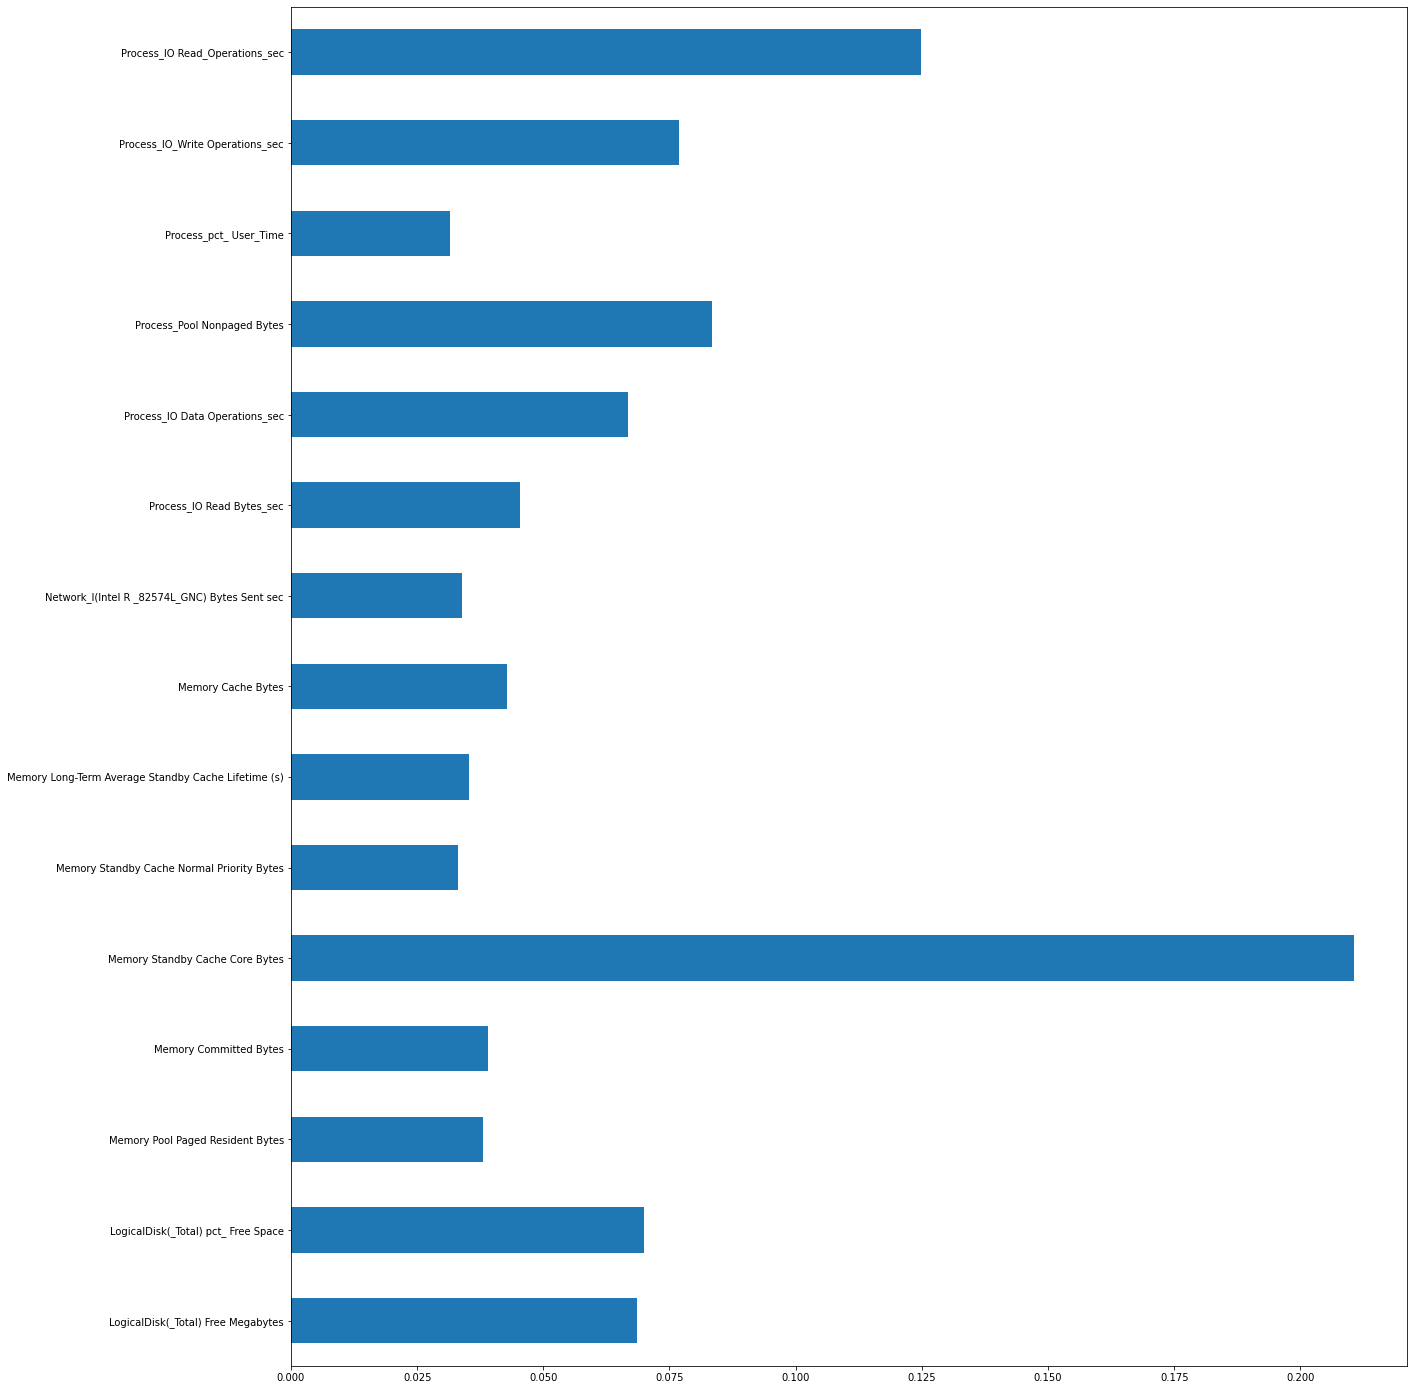

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier



x = df.drop('label', axis=1)
y = df['label']

model = RandomForestClassifier()
model.fit(x, y)

(pd.Series(model.feature_importances_, index=x.columns)
   # .nlargest(4)
   .plot(kind='barh',figsize = (20, 25) ))

<AxesSubplot:>

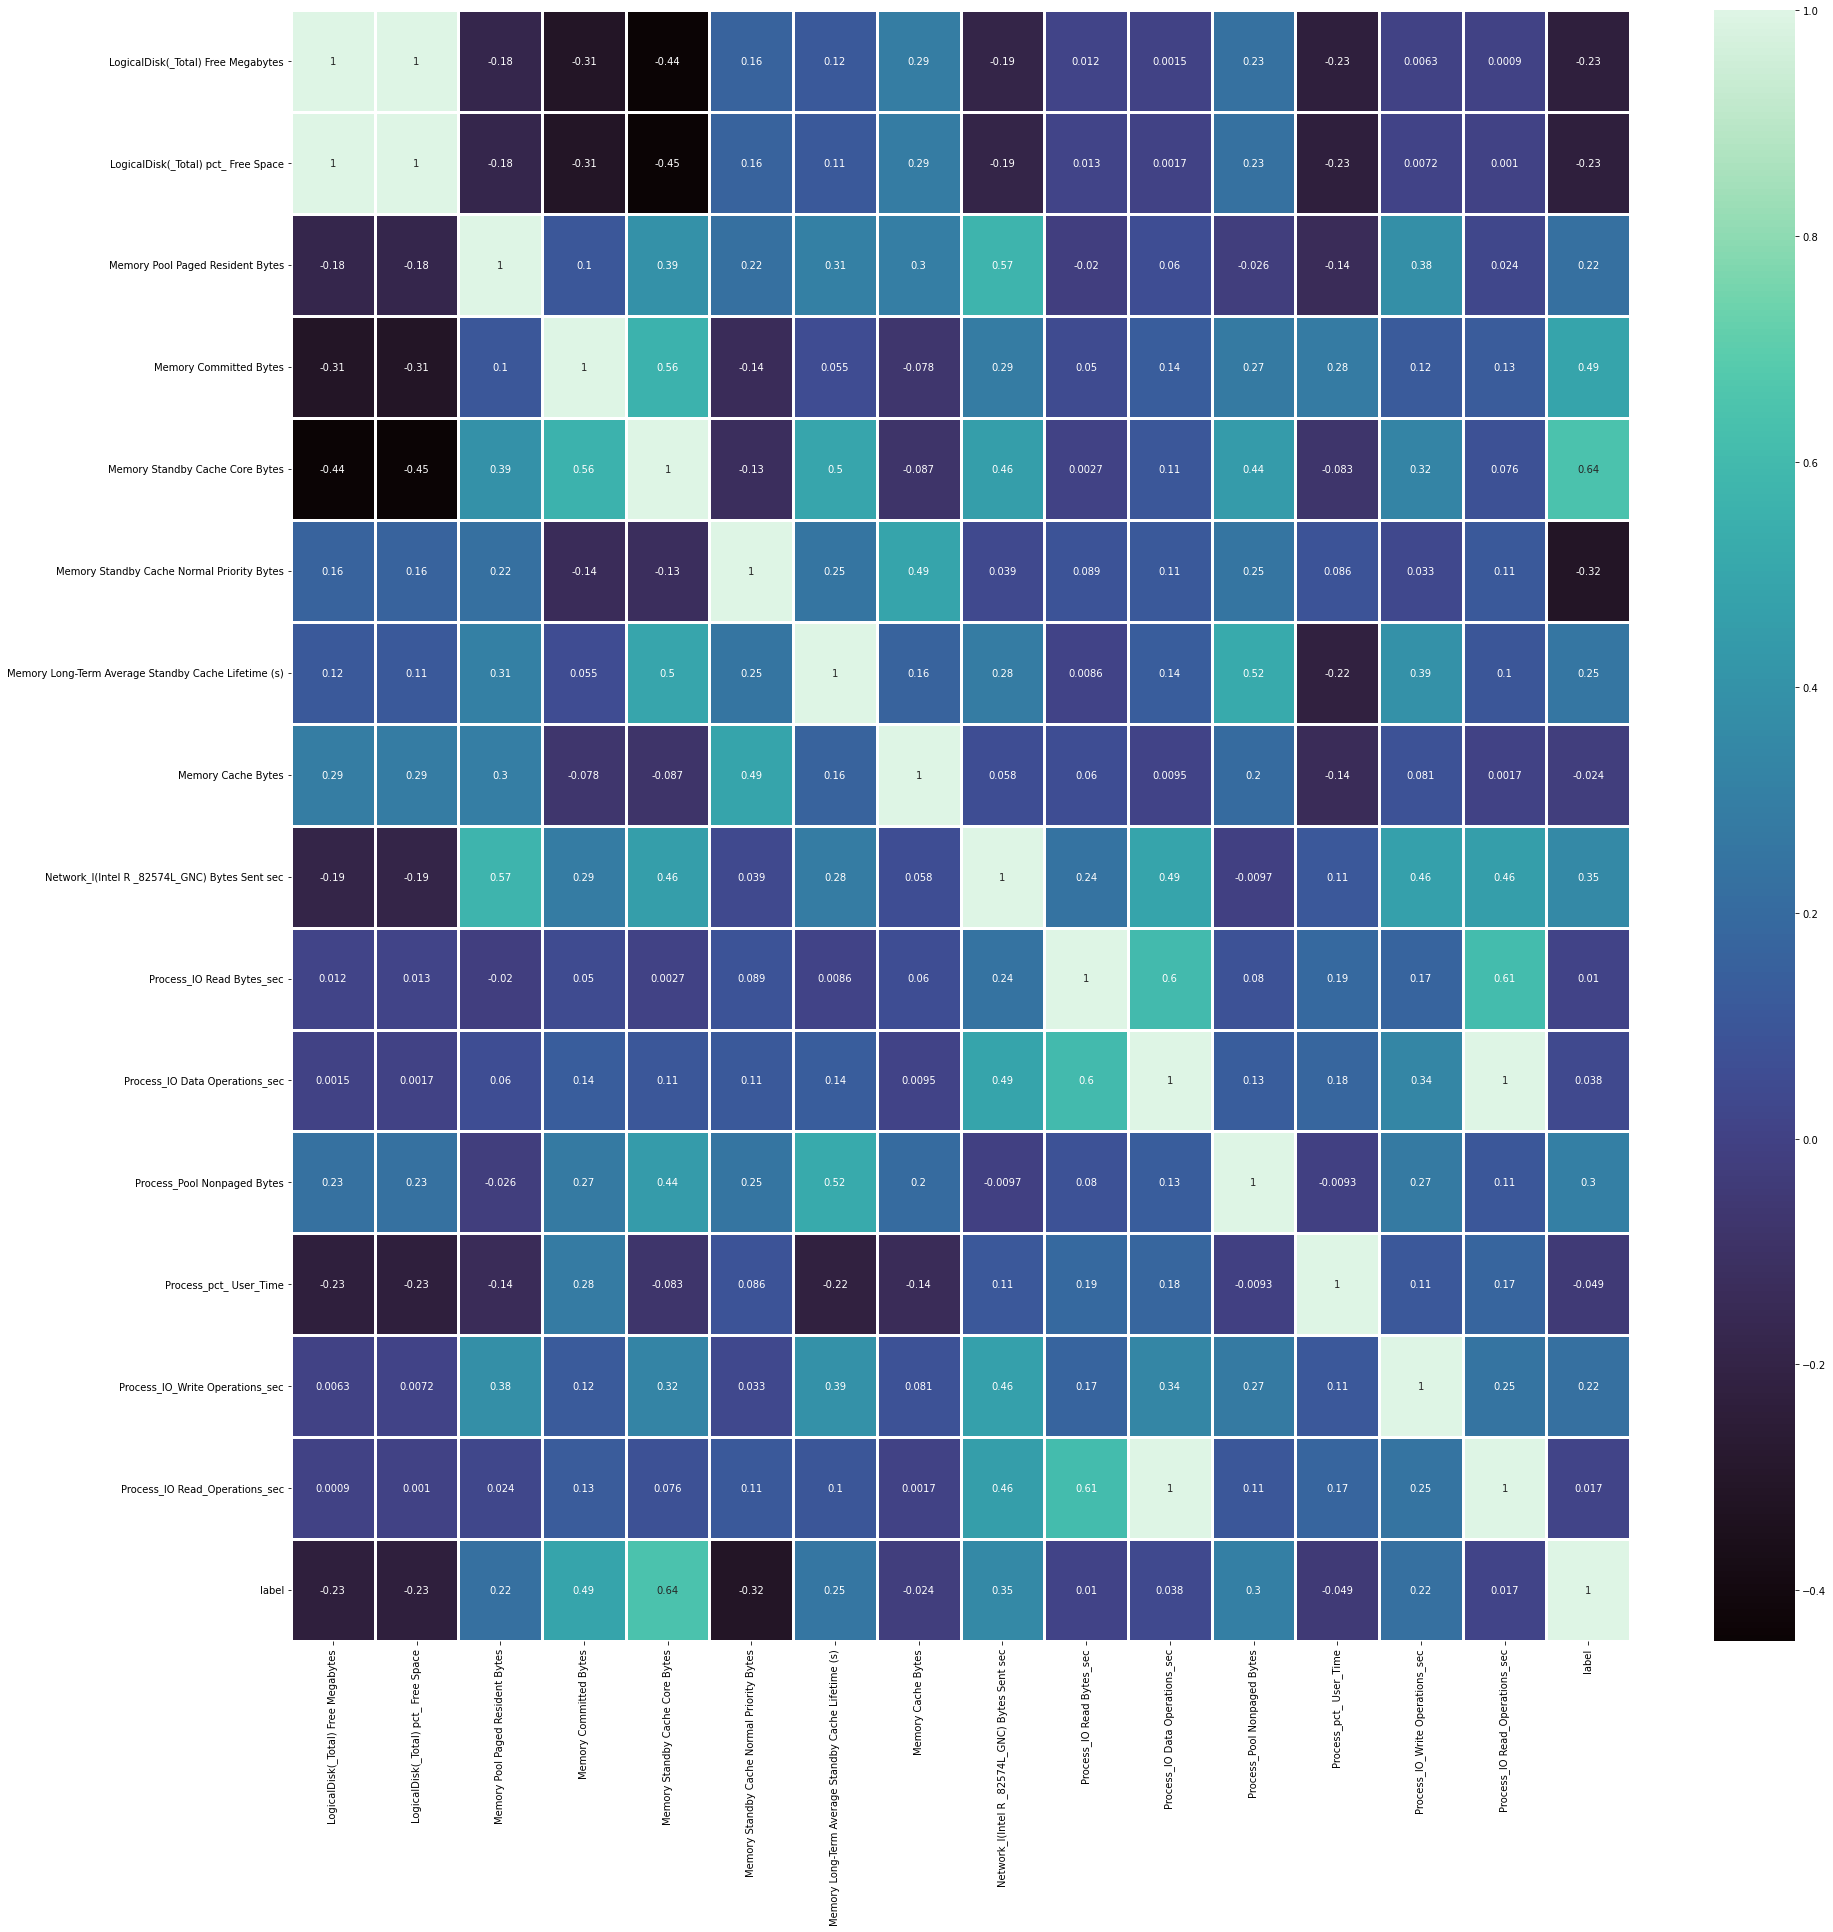

In [40]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, linewidth = 3, cmap='mako')

In [41]:
df.drop('LogicalDisk(_Total) pct_ Free Space', axis = 1, inplace = True)

In [42]:
x = df.drop('label', axis=1)
y = df['label']

# Without Oversampling

In [43]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [44]:
df.shape

(14456, 15)

In [45]:
# --------------------------Random Forest -----------------------------------
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=1)
rfc.fit(x_train, y_train) #Training the model
y_pred_rfc = rfc.predict(x_test)
print(y_pred_rfc)# printing predictions

#Accuracy Score

from sklearn.metrics import accuracy_score
rfcAccuracy = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print("Accuracy of rfc: ",rfcAccuracy)

#F1 Score

from sklearn.metrics import f1_score
rfcF1 = round(f1_score(y_test, y_pred_rfc)*100,2)
print("f1_score of rfc: ",rfcF1)

#AUC Score

from sklearn.metrics import roc_auc_score
rfcAuc = round(roc_auc_score (y_test, y_pred_rfc)*100,2)
print('AUC Score of rfc:',rfcAuc)

[0. 0. 0. ... 0. 0. 0.]
Accuracy of rfc:  96.62
f1_score of rfc:  97.06
AUC Score of rfc: 96.42


In [49]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,15),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }
def hypertuning_rscv(est, p_distr, nbr_iter,x,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(x,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [50]:
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, x, y)

In [51]:
print(rf_parameters)
print(rf_ht_score)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 2, 'n_estimators': 200}
0.8931839557271102


In [ ]:
classifier=RandomForestClassifier(n_jobs=-1, bootstrap= False, criterion= 'gini', max_depth= 10, max_features= 2, min_samples_leaf= 2, n_estimators= 200)

In [56]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [57]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [58]:
reg_decision_model = DecisionTreeClassifier()

In [59]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)


In [62]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [63]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(x,y)

timer(start_time)

In [64]:
# best model score
tuning_model.best_score_

-0.1189843038916484

In [65]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 11,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.2,
 'splitter': 'best'}

In [66]:
pip install shap

  Using cached shap-0.41.0-cp310-cp310-win_amd64.whl (435 kB)
  Using cached numba-0.56.4-cp310-cp310-win_amd64.whl (2.5 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\mubah\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [67]:
import shap
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
shap.initjs()
explainer = shap.Explainer(rfc)
shap_values = explainer(x_test)



In [68]:
shap.initjs()
explainer = shap.Explainer(rfc)
shap_values = explainer(x_train)


In [69]:
# visualize the first prediction's explanation
shap.initjs()
shap.plots.waterfall(shap_values[0])

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

In [35]:
from interpret.blackbox import LimeTabular
from interpret import show
# dtc = DecisionTreeClassifier()
# dtc.fit(x_train, y_train)
# y_pred = dtc.predict(x_test)
# print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
# print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# %% Apply lime
# Initilize Lime for Tabular data
lime = LimeTabular(predict_fn=rfc.predict_proba, 
                   data=x_train, 
                   random_state=1)
# Get local explanations
lime_local = lime.explain_local(x_test[-200:], 
                                y_test[-200:], 
                                name='LIME')
show(lime_local)

<!-- http://127.0.0.1:7001/2586896319488/ -->

In [33]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
lrAccuracy = round(accuracy_score(y_test, y_pred_lr)*100,2)
print("Accuracy of LR: ",lrAccuracy)

#F1 Score

from sklearn.metrics import f1_score
lrF1 = round(f1_score(y_test, y_pred_lr)*100,2)
print("f1_score of LR: ",lrF1)

#AUC Score

from sklearn.metrics import roc_auc_score
lrAuc = round(roc_auc_score (y_test, y_pred_lr)*100,2)
print('AUC Score of LR:',lrAuc)

[1. 1. 1. ... 0. 0. 0.]
Accuracy of LR:  70.89
f1_score of LR:  74.17
AUC Score of LR: 70.5


In [ ]:
from interpret.blackbox import LimeTabular
from interpret import show
# dtc = DecisionTreeClassifier()
# dtc.fit(x_train, y_train)
# y_pred = dtc.predict(x_test)
# print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
# print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# %% Apply lime
# Initilize Lime for Tabular data
lime = LimeTabular(predict_fn=lr.predict_proba, 
                   data=x_train, 
                   random_state=1)
# Get local explanations
lime_local = lime.explain_local(x_test[-200:], 
                                y_test[-200:], 
                                name='LIME')
show(lime_local)